In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

In [2]:
import nltk 

In [3]:
from nltk.tokenize import sent_tokenize , word_tokenize

In [4]:
data = pd.read_csv('Combined_News_DJIA.csv')


In [5]:
data.head(1)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""


In [6]:
train= data[data['Date']<'2015-01-01']
test = data[data['Date'] > '2014-12-31']

In [7]:
example = train.iloc[3,8]
example

'b"Bush announces Operation Get All Up In Russia\'s Grill. Yeah, this will end well."'

In [8]:
example2 = example.lower()

In [9]:
#removing punctuation and gaps.
example3 = CountVectorizer().build_tokenizer()(example2)

In [10]:
set(example3)

{'all',
 'announces',
 'bush',
 'end',
 'get',
 'grill',
 'in',
 'operation',
 'russia',
 'this',
 'up',
 'well',
 'will',
 'yeah'}

In [11]:
pd.DataFrame([[x, example3.count(x)] for x in set(example3)], columns= ['word','count'] )

,word,count
0,this,1
1,announces,1
2,all,1
3,in,1
4,get,1
5,well,1
6,end,1
7,russia,1
8,yeah,1
9,up,1


In [12]:
train.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610],
           dtype='int64', length=1611)

# Bag of Word 

Placed all of our headlines into a "bag" and counted the words as we pulled them out.

In [13]:
trainheadlines = []
for row in range(0, len(train.index)):
    trainheadlines.append(' '.join(str(x) for x in train.iloc[row, 2:27 ] ))

In [55]:
# Alternative way to combined all the headlines.

Combined =data.iloc[:,2:27].apply(lambda row: ''.join(str(row.values)), axis=1)
Combined.head()

0    [ 'b"Georgia \'downs two Russian warplanes\' a...
1    [ "b'Why wont America and Nato help us? If the...
2    [ "b'Remember that adorable 9-year-old who san...
3    ["b' U.S. refuses Israel weapons to attack Ira...
4    ["b'All the experts admit that we should legal...
dtype: object

In [14]:
basicvectorizer = CountVectorizer()
basictrain = basicvectorizer.fit_transform(trainheadlines)
print(basictrain.shape)

(1611, 31675)


In [15]:
basicmodel = LogisticRegression()
basicmodel = basicmodel.fit(basictrain, train["Label"])

In [16]:
testheadlines= []
for row in range(0, len(test.index)):
    testheadlines.append(' '.join( str(x) for x in test.iloc[row,2:27 ]))

In [17]:
basictest = basicvectorizer.transform(testheadlines) #get the count
predictions = basicmodel.predict(basictest)

In [18]:
predictions

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0,

In [19]:
pd.crosstab(test["Label"], predictions, rownames=["Actual"], colnames=["Predicted"] )

Predicted,0,1
Actual,,
0,61,125
1,92,100


In [20]:
basicwords=basicvectorizer.get_feature_names()
basiccoeffs= basicmodel.coef_.tolist()[0]
coeffdf = pd.DataFrame({'Word' : basicwords, 
                        'Coefficient' : basiccoeffs})
coeffdf = coeffdf.sort_values(['Coefficient','Word'], ascending=[0,1])
coeffdf.head()

,Coefficient,Word
19419,0.497924,nigeria
25261,0.452526,self
29286,0.428011,tv
15998,0.425863,korea
20135,0.425716,olympics


In [21]:
coeffdf.tail()

,Coefficient,Word
16949,-0.463116,low
3651,-0.470454,begin
25433,-0.494555,sex
24754,-0.549725,sanctions
24542,-0.587794,run


# N-gram model 

N represents the length of a sequence of words to be counted. bag-of-words model was the same as an n-gram model where 
n = 1. So now, let's see what happens when we run an n-gram model where n = 2.

In [22]:
advancedvectorizer= CountVectorizer(ngram_range=(2,2))
advancedtrain = advancedvectorizer.fit_transform(trainheadlines)
print(advancedtrain.shape)

(1611, 366721)


In [109]:
DTM_With_Colm = pd.DataFrame(advancedtrain.toarray(),columns= advancedvectorizer.get_feature_names())
DTM_With_Colm.head(2)

,00 75,00 am,00 bail,00 decade,00 despite,00 gmt,00 history,00 pm,00 turn,000 00,...,zuma the,zuma uses,zuma will,zumas trademark,zurich china,zurich tram,zurich will,zuyevo rice,zweimal hitler,zygi naval
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# This time we have 366,721 unique variables representing TWO-word combinations!

In [25]:
advancedmodel = LogisticRegression()
advancedmodel = advancedmodel.fit(advancedtrain, train["Label"])

In [26]:
testheadlines = []
for row in range(0, len(test.index)):
    testheadlines.append(' '.join(str(x) for x in test.iloc[row,2:27]))
advancedtest = advancedvectorizer.transform(testheadlines)
advpredictions = advancedmodel.predict(advancedtest)       

In [27]:
pd.crosstab(test["Label"],advpredictions, rownames=["Actual"], colnames=["Predicted"])

Predicted,0,1
Actual,,
0,66,120
1,45,147


In [28]:
advwords = advancedvectorizer.get_feature_names()
advcoeffs = advancedmodel.coef_.tolist()[0]
advcoeffdf = pd.DataFrame({'Words' : advwords, 
                        'Coefficient' : advcoeffs})
advcoeffdf = advcoeffdf.sort_values(['Coefficient', 'Words'], ascending=[0, 1])
advcoeffdf.head(10)

,Coefficient,Words
272047,0.286533,right to
24710,0.275274,and other
285392,0.274698,set to
316194,0.262873,the first
157511,0.227943,in china
159522,0.224184,in south
125870,0.219130,found in
124411,0.216726,forced to
173246,0.211137,it has
322590,0.209239,this is


In [29]:
import numpy as np
from sklearn.metrics import accuracy_score
y_pred = advpredictions
y_true = test["Label"]
accuracy_score(y_pred,y_true)

0.56349206349206349

# Latent Dirichlet Allocation

Topic Modelling  

In [30]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


In [31]:
tokenizer = RegexpTokenizer(r'\w+')

In [32]:
# create English stop words list
stop_words= set(stopwords.words("english"))

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()

# list for tokenized documents in loop
texts = []

for i in trainheadlines:
    raw= i.lower()
    token=tokenizer.tokenize(raw)
    
    # remove stop words from tokens
    stopped_tokens = [word for word in token if word not in stop_words]
    
    # stem tokens
    stemmed_tokens  = [p_stemmer.stem(w) for w in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)


In [33]:
from gensim import corpora, models
import gensim

In [36]:
# How many times does the word system appear in the document
dictionary = corpora.Dictionary(texts)
print(dictionary)

Dictionary(21023 unique tokens: ['b', 'georgia', 'down', 'two', 'russian']...)


In [108]:
print(dictionary.token2id.head)

AttributeError: 'dict' object has no attribute 'head'

In [39]:
#21023 unique tokens unique id are given....now convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

In [41]:
#generate LDA
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=10, 
                                           id2word = dictionary, passes=1,chunksize=10000,update_every=1)

In [46]:
ldamodel.print_topics(5)

[(2,
  '0.006*"say" + 0.005*"year" + 0.004*"world" + 0.004*"new" + 0.004*"us" + 0.004*"protest" + 0.003*"polic" + 0.003*"kill" + 0.003*"govern" + 0.003*"russia"'),
 (0,
  '0.007*"b" + 0.005*"kill" + 0.004*"new" + 0.004*"us" + 0.004*"say" + 0.004*"world" + 0.004*"year" + 0.004*"china" + 0.003*"protest" + 0.003*"polic"'),
 (9,
  '0.026*"b" + 0.006*"year" + 0.005*"us" + 0.004*"say" + 0.004*"israel" + 0.004*"china" + 0.004*"peopl" + 0.004*"u" + 0.004*"polic" + 0.003*"kill"'),
 (5,
  '0.053*"b" + 0.006*"say" + 0.005*"us" + 0.005*"kill" + 0.004*"new" + 0.004*"year" + 0.004*"israel" + 0.003*"govern" + 0.003*"china" + 0.003*"protest"'),
 (4,
  '0.018*"b" + 0.006*"us" + 0.005*"say" + 0.005*"year" + 0.004*"govern" + 0.004*"world" + 0.004*"israel" + 0.003*"new" + 0.003*"attack" + 0.003*"report"')]

In [47]:
import pyLDAvis.gensim

In [48]:
pyLDAvis.enable_notebook()
news = pyLDAvis.gensim.prepare(ldamodel,corpus, dictionary)

In [49]:
news

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
3      24.832743        1       1 -0.008118  0.002914
5      23.471366        1       2 -0.020361 -0.001313
4      11.368453        1       3 -0.001676  0.001080
1      10.708822        1       4  0.008699  0.002183
8       9.005323        1       5 -0.004986 -0.000276
9       8.172015        1       6 -0.005596  0.001923
6       5.567590        1       7  0.007520  0.004226
7       2.819957        1       8  0.002298 -0.007318
2       2.115130        1       9  0.014713 -0.000023
0       1.938601        1      10  0.007508 -0.003397, topic_info=     Category          Freq     Term         Total  loglift  logprob
term                                                                
0     Default  13510.000000        b  13510.000000  30.0000  30.0000
42    Default   2288.000000     year   2288.000000  29.0000  29.0000
39    Default   2679.000000      say   2679.000000  28.0000  28.0000
150   Default   1777.000000      new   1777.000000  27.0000  27.0000
132   Default   2428.000000       us   2428.000000  26.0000  26.0000
77    Default   2125.000000     kill   2125.000000  25.0000  25.0000
116   Default   1879.000000    world   1879.000000  24.0000  24.0000
152   Default   1587.000000  protest   1587.000000  23.0000  23.0000
111   Default   1712.000000    china   1712.000000  22.0000  22.0000
636   Default   1814.000000   govern   1814.000000  21.0000  21.0000
269   Default   1586.000000    polic   1586.000000  20.0000  20.0000
13    Default   1299.000000   russia   1299.000000  19.0000  19.0000
6     Default   1432.000000  countri   1432.000000  18.0000  18.0000
169   Default   1163.000000   report   1163.000000  17.0000  17.0000
76    Default   1563.000000    peopl   1563.000000  16.0000  16.0000
9     Default   1427.000000      war   1427.000000  15.0000  15.0000
354   Default   1095.000000      use   1095.000000  14.0000  14.0000
85    Default   1285.000000   attack   1285.000000  13.0000  13.0000
280   Default   1312.000000    state   1312.000000  12.0000  12.0000
732   Default   1152.000000      one   1152.000000  11.0000  11.0000
1164  Default    993.000000    korea    993.000000  10.0000  10.0000
84    Default   2021.000000   israel   2021.000000   9.0000   9.0000
413   Default   1148.000000   presid   1148.000000   8.0000   8.0000
596   Default   1111.000000       uk   1111.000000   7.0000   7.0000
168   Default    736.000000      amp    736.000000   6.0000   6.0000
638   Default    932.000000      law    932.000000   5.0000   5.0000
382   Default   1158.000000    right   1158.000000   4.0000   4.0000
156   Default   1195.000000      000   1195.000000   3.0000   3.0000
337   Default    832.000000     said    832.000000   2.0000   2.0000
409   Default    848.000000      man    848.000000   1.0000   1.0000
...       ...           ...      ...           ...      ...      ...
85    Topic10     28.915287   attack   1285.503092   0.1487  -5.8064
1582  Topic10     12.973040        3    464.927658   0.3642  -6.6079
354   Topic10     25.027591      use   1095.848877   0.1639  -5.9508
111   Topic10     34.722844    china   1712.356637   0.0450  -5.6234
152   Topic10     32.091497  protest   1587.601522   0.0418  -5.7022
413   Topic10     24.548387   presid   1148.580653   0.0976  -5.9701
992   Topic10     11.538404   reveal    422.642015   0.3424  -6.7251
4     Topic10     20.940090  russian    943.122822   0.1357  -6.1291
132   Topic10     42.388845       us   2428.377404  -0.1049  -5.4239
478   Topic10     17.867635     plan    764.421528   0.1871  -6.2878
312   Topic10     16.538657    women    694.063015   0.2063  -6.3651
236   Topic10     16.511175    india    693.955292   0.2048  -6.3667
364   Topic10     16.160274    could    675.624862   0.2101  -6.3882
1531  Topic10     18.669841    court    825.422119   0.1542  -6.2439
269   Topic10     29.870484    polic   1586.057013  -0.0289  -5.77

In [76]:
from wordcloud import WordCloud,STOPWORDS
import re
from sklearn.cross_validation import train_test_split

/Users/sarveshrawat/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [85]:
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
data['Combined']=data.iloc[:,2:27].apply(lambda row: ''.join(str(row.values)), axis=1)

In [77]:
train,test = train_test_split(data,test_size=0.2,random_state=42)

In [78]:
non_decrease = train[train['Label']==1]
decrease = train[train['Label']==0]
print(len(non_decrease)/len(data))

0.4213172448466566


In [105]:
non_decrease['Combined'].head(3)

807     ["Libyan forces 'capture Gaddafi' - local TV r...
1939    ['The Netherlands to decriminalize insulting h...
1273    [ "Saudi Arabia's cabinet has passed a ban on ...
Name: Combined, dtype: object

In [81]:
def to_words(content):
    letters_only= re.sub("[^a-zA-Z']", " ", content)
    words=letters_only.lower().split()
    stops=set(stopwords.words("english"))
    meaningful_words = [w for w in words if w not in stops]
    return (" ".join(meaningful_words))
    

In [107]:
for each in non_decrease['Combined']:
    print(each)
    print (to_words(each))
    break    

["Libyan forces 'capture Gaddafi' - local TV reports."
 'Whistleblowers murdered in India illustrate the fatal hazards of exposing corruption'
 'Report into undercover police delayed, allegations that police chiefs had authorised undercover police officers to give false evidence in court.'
 'Russia is pressing for a UN resolution aimed at keeping thousands of shoulder-fired surface-to-air missiles purchased by former Libyan leader Moammar Gadhafi from getting into the hands of armed groups and terrorists.'
 'Its time for the UN to formally apologize for having legitimized Gaddafis regime by electing Libya to its Human Rights Council last year, to the Security Council in 2008-2009, and as General Assembly president in 2009,'
 'Muammar Gaddafi killed'
 'At 105, Celebrated Chinese Linguist Now A Dissident: Zhou Youguang --"Ordinary people no longer believe in the Communist Party. ... People ask me if there\'s hope for China. I\'m an optimist. I didn\'t even lose hope during the Japanese o

In [82]:
non_decrease_word=[]
decrease_word=[]
for each in non_decrease['Combined']:
    non_decrease_word.append(to_words(each))
for each in decrease['Combined']:
    decrease_word.append(to_words(each))

In [83]:
wordcloud1 = WordCloud(background_color='black',
                      width=3000,
                      height=2500
                     ).generate(decrease_word[0])

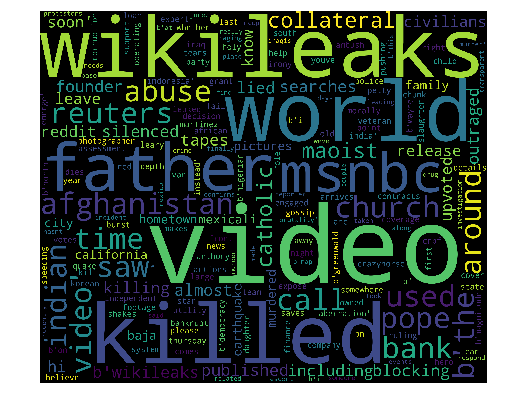

In [86]:
plt.figure(1,figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()

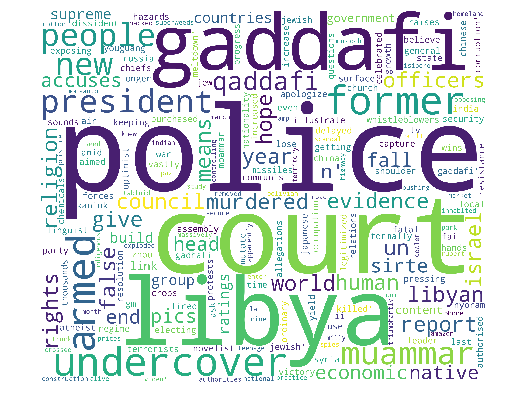

In [87]:
wordcloud2 = WordCloud(background_color='white',
                      width=3000,
                      height=2500
                     ).generate(non_decrease_word[0])
plt.figure(1,figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

# Feature extraction

Use tf-idf model for feature extraction as it can make the informative features weighted enough.

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
train_text = []
test_text = []
for each in train['Combined']:
    train_text.append(to_words(each))

for each in test['Combined']:
    test_text.append(to_words(each))

In [89]:
train_features = tfidf.fit_transform(train_text)
test_features = tfidf.transform(test_text)

In [97]:
train_features.toarray

<bound method _cs_matrix.toarray of <1591x30601 sparse matrix of type '<class 'numpy.float64'>'
	with 409442 stored elements in Compressed Sparse Row format>>

# Model fitting

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from ggplot import *


/Users/sarveshrawat/anaconda/lib/python3.6/site-packages/statsmodels/base/wrapper.py:94: DeprecationWarning:

inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()

/Users/sarveshrawat/anaconda/lib/python3.6/site-packages/statsmodels/base/wrapper.py:94: DeprecationWarning:

inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()

/Users/sarveshrawat/anaconda/lib/python3.6/site-packages/statsmodels/base/wrapper.py:94: DeprecationWarning:

inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()

/Users/sarveshrawat/anaconda/lib/python3.6/site-packages/statsmodels/base/wrapper.py:94: DeprecationWarning:

inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()

/Users/sarveshrawat/anaconda/lib/python3.6/site-packages/statsmodels/base/wrapper.py:94: DeprecationWarning:

inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()

/User

In [93]:
Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(),
    GaussianNB()]

In [95]:
fpr

array([ 0.        ,  0.57894737,  1.        ])

Accuracy of LogisticRegression is 0.570351758794


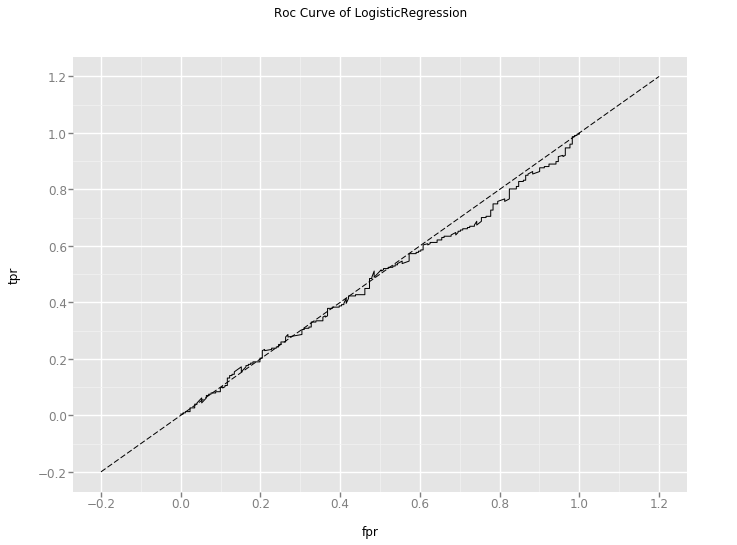

<ggplot: (-9223372036255939419)>
Accuracy of KNeighborsClassifier is 0.522613065327


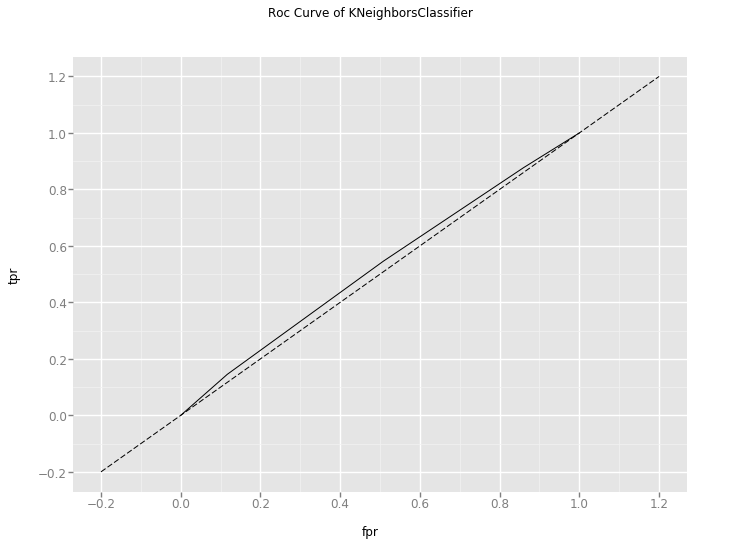

<ggplot: (589395432)>
Accuracy of SVC is 0.570351758794


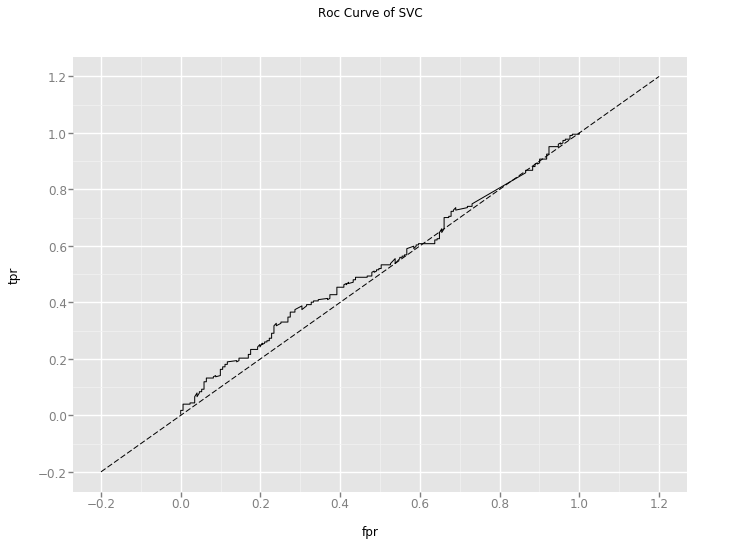

<ggplot: (590796131)>
Accuracy of DecisionTreeClassifier is 0.51256281407


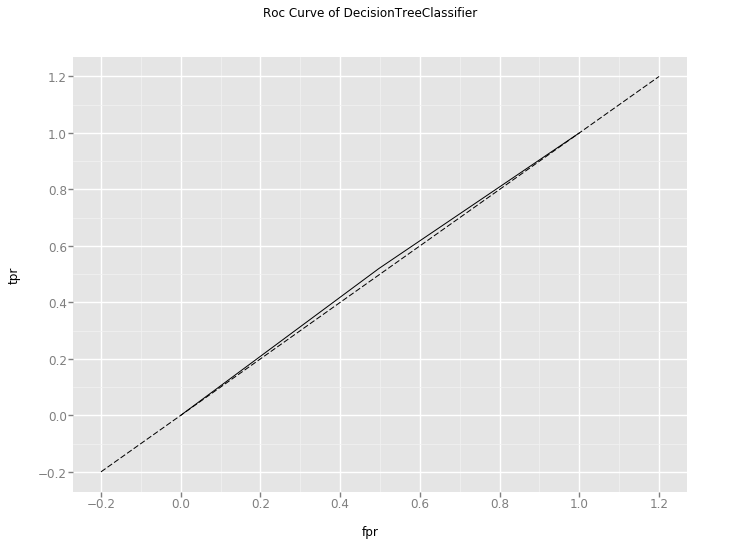

<ggplot: (283116685)>
Accuracy of RandomForestClassifier is 0.547738693467


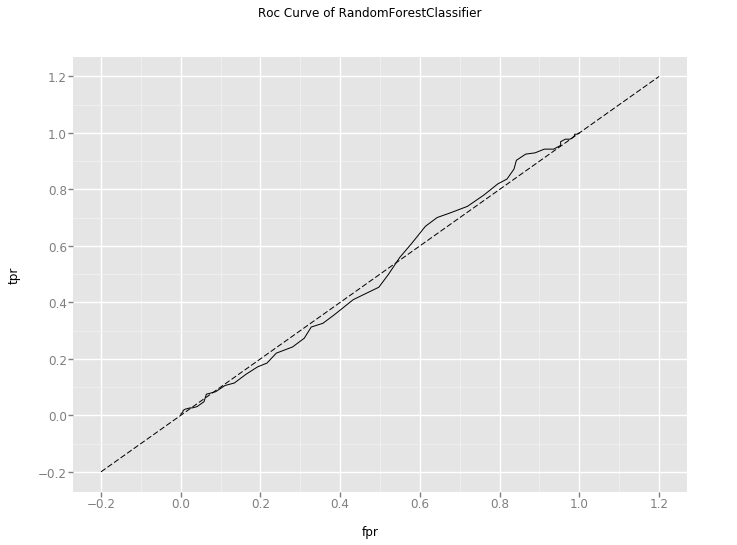

<ggplot: (-9223372036257436216)>
Accuracy of AdaBoostClassifier is 0.520100502513


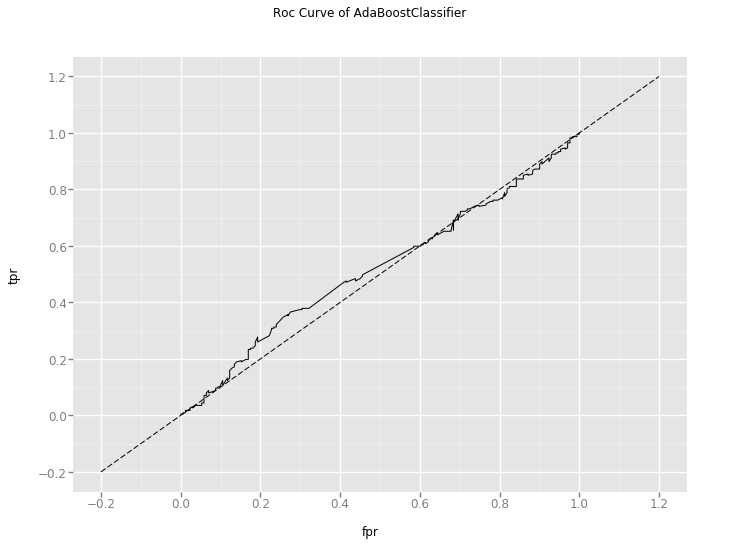

<ggplot: (598047415)>
Accuracy of GaussianNB is 0.482412060302


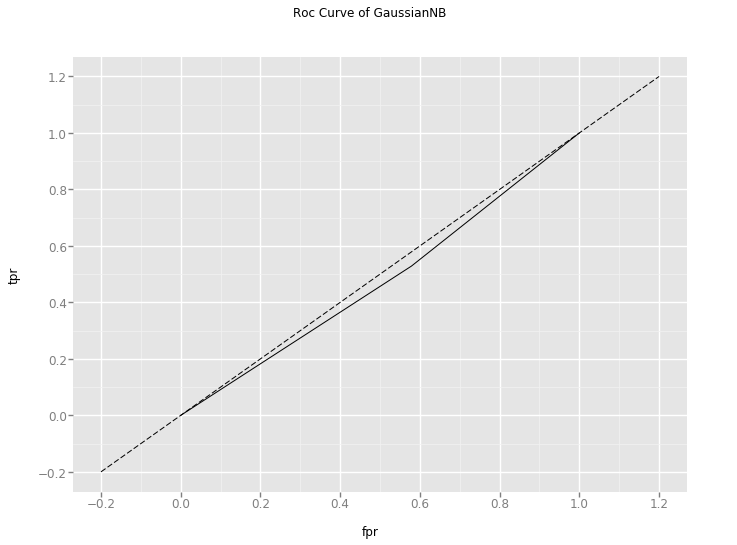

<ggplot: (-9223372036260723270)>


In [94]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['Label'])
        pred = fit.predict(test_features)
        prob = fit.predict_proba(test_features)[:,1]
    except Exception:
        fit = classifier.fit(dense_features,train['Label'])
        pred = fit.predict(dense_test)
        prob = fit.predict_proba(dense_test)[:,1]
    accuracy = accuracy_score(pred,test['Label'])
    Accuracy.append(accuracy)
    
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))
    fpr, tpr, _ = roc_curve(test['Label'],prob)
    
    tmp = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
    g = ggplot(tmp, aes(x='fpr', y='tpr')) +geom_line() +geom_abline(linetype='dashed')+ ggtitle('Roc Curve of '+classifier.__class__.__name__)
    print(g)